<a href="https://colab.research.google.com/github/Biokatzen/Hepatitis-C-Prediction-Dataset/blob/main/HepatitisC_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Prediction Dataset

The dataset used in this study contains data from female and male blood donors and patients suffering from hepatitis C, fibrosis and cirrhosis with ages ranged from 19 to 77. These are the categorical variables that will be used for classification and clustering later on. The numerical variables are the following: ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT, which are traditional diagnostic tests for liver diseases.

The table below resumes all the attributes found in this dataset:


| **Attribute** | **Value** | **Value Label** | **Type** | **Description** |
|----------------|----------------|-----------------|-----------|-----------------|
| **Patient ID/No.** | Numeric | – | Integer | Patient identification |
| **Category** | 0 | Blood Donor | Categorical | Diagnosis of the patient. Blood donor vs Hepatitis C including its progress to Fibrosis and Cirrhosis |
|  | 0s | Suspect Blood Donor |  |  |
|  | 1 | Hepatitis |  |  |
|  | 2 | Fibrosis |  |  |
|  | 3 | Cirrhosis |  |  |
| **Age** | Numeric | – | Integer |  |
| **Sex** | f | Female | Binary |  |
|  | m | Male |  |  |
| **ALB** | Numeric | – | Continuous | Albumin Blood Test (g/L)|
| **ALP** | Numeric | – | Continuous | Alkaline Phosphatase (U/L) |
| **ALT** | Numeric | – | Continuous | Alanine Transaminase (U/L) |
| **AST** | Numeric | – | Continuous | Aspartate Transaminase (U/L)|
| **BIL** | Numeric | – | Continuous | Bilirubin (µmol/L) |
| **CHE** | Numeric | – | Continuous | Acetylcholinesterase (U/mL)|
| **CHOL** | Numeric | – | Continuous | Cholesterol (mmol/L) |
| **CREA** | Numeric | – | Continuous | Creatinine (µmol/L) |
| **GGT** | Numeric | – | Continuous | Gamma-Glutamyl Transferase (U/L) |
| **PROT** | Numeric | – | Continuous | Total Protein (g/L)|


In [166]:
import pandas as pd
import os

Firstly, the dataset is loaded into google colab  enviroment and printed to have a first look. As we can see below, the dataset has 615 rows and 14 columns

In [167]:
location = '/content/drive/MyDrive/Colab Notebooks'
os.chdir(location)
df = pd.read_csv('HepatitisCdata.csv', header=0, sep=';')
df.shape
print(df)

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.1

As we can see, the first column should be the Patient ID/No. but in the dataset appears as an unnamed column, so the dataset has to be modified to add this column name. Additionally, it would be better to have the values male and female in the sex column, instead of f and m, which are less informative


In [168]:
df.rename(columns={'Unnamed: 0': 'Patient ID'}, inplace=True)
df['Sex'] = df['Sex'].replace({'m': 'male', 'f': 'female'})
print(df)

     Patient ID       Category  Age     Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32    male  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32    male  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32    male  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32    male  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32    male  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...     ...   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62  female  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64  female  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64  female  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46  female  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59  female  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  


An important pre-processing step is handle the NA values. Firstly the NA values are counted by column to have an idea of how many are they.

In [169]:
df.isna().sum()


,0
Patient ID,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


As we can see above, the columns with the most NA values are CHOL and ALP with 10 and 18 NA values respectively. But as the dataset has 615 rows, removing these rows won't make a big impact in the model.

In [170]:
df_without_na = df.dropna()
print(df_without_na.shape)

(589, 14)


The next step is to have a look to the outliers of every variable. For this, the z-score is calculated for all numerical variables. For this, we need to remove the categorical variables that appears as numbers before calculating the z-score and add them afterwards

In [171]:

import numpy as np
from scipy.stats import zscore

exclude_cols = ['Patient ID', 'Age'] #Categorical columns that have numerical values
numerical_cols = df_without_na.select_dtypes(include=np.number).columns
continuous_cols = [c for c in numerical_cols if c not in exclude_cols] #All numerical columns excluding the ones in exclude_cols

df_scaled = df_without_na.copy()
df_scaled[continuous_cols] = df_without_na[continuous_cols].apply(zscore) #Z-score applied

print(df_scaled.head())

mean = df_scaled[continuous_cols].mean()
std = df_scaled[continuous_cols].std()

mask = (np.abs(df_scaled[continuous_cols]) < 3).all(axis=1) #Filter out the rows with a score higher than 3
df_no_outliers = df_scaled[mask]
print(df_no_outliers.head())

   Patient ID       Category  Age   Sex       ALB       ALP       ALT  \
0           1  0=Blood Donor   32  male -0.542701 -0.603230 -0.905494   
1           2  0=Blood Donor   32  male -0.542701  0.084054 -0.411380   
2           3  0=Blood Donor   32  male  0.916417  0.253944  0.461714   
3           4  0=Blood Donor   32  male  0.273710 -0.622536  0.193070   
4           5  0=Blood Donor   32  male -0.421108  0.230777  0.289014   

        AST       BIL       CHE      CHOL      CREA       GGT      PROT  
0 -0.355457 -0.202289 -0.581777 -1.916091  0.480336 -0.481022 -0.540788  
1 -0.276283 -0.409283  1.354993 -0.524241 -0.151402 -0.416513  0.862566  
2  0.573318 -0.282787  0.290683 -0.169629  0.085500 -0.092127  1.386485  
3 -0.340231  0.453193 -0.399063 -0.577433 -0.032951 -0.081068  0.712875  
4 -0.273238 -0.081542  0.432286 -0.949775 -0.111918 -0.152949 -0.596922  
   Patient ID       Category  Age   Sex       ALB       ALP       ALT  \
0           1  0=Blood Donor   32  male -0.5

Below we have quiantified the amount of outliers removed:

In [172]:
print(f"Original rows: {df_scaled.shape[0]}")
print(f"Rows after eliminating outliers: {df_no_outliers.shape[0]}")
print(f"Outliers removed: {df_scaled.shape[0] - df_no_outliers.shape[0]}")


Original rows: 589
Rows after eliminating outliers: 532
Outliers removed: 57


Additionally, a boxplot has been created to visualize the different of the continuous variables with and without outliers

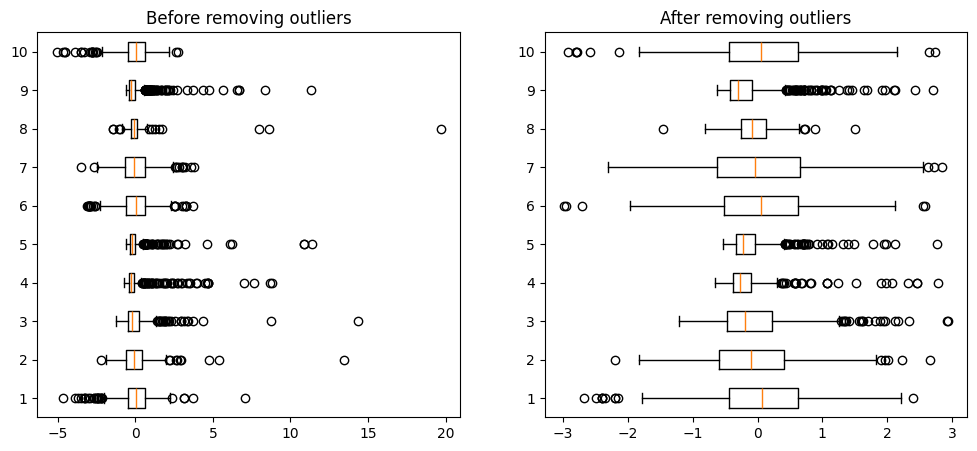

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(df_scaled[continuous_cols], vert=False)
plt.title("Before removing outliers")

plt.subplot(1,2,2)
plt.boxplot(df_no_outliers[continuous_cols], vert=False)
plt.title("After removing outliers")

plt.show()


After checking before and after removing outliers, makes more sense to continue with the dataset without outliers to not disturb the linear regression model. Also, some outliers have quite big z scores which are more likely lab errors.

Following the pre-processing steps, the categorical variables 'Category' and 'Sex' need to be converted into a numerical format. As any of them have ordinal categories, the method chosen is One-Hot Encoding.

In [174]:
df_encoded = pd.get_dummies(df_no_outliers, columns=['Category', 'Sex'], prefix=['Category', 'Sex'], dtype=int)
#To have binary numbers intead of booleans it is important to specify dtype=int in the get_dummies function.
print(df_encoded.head)

<bound method NDFrame.head of      Patient ID  Age       ALB       ALP       ALT       AST       BIL  \
0             1   32 -0.542701 -0.603230 -0.905494 -0.355457 -0.202289   
1             2   32 -0.542701  0.084054 -0.411380 -0.276283 -0.409283   
2             3   32  0.916417  0.253944  0.461714  0.573318 -0.282787   
3             4   32  0.273710 -0.622536  0.193070 -0.340231  0.453193   
4             5   32 -0.421108  0.230777  0.289014 -0.273238 -0.081542   
..          ...  ...       ...       ...       ...       ...       ...   
580         581   68  0.238969 -1.746129 -1.035019  0.253576  0.056454   
589         590   45 -2.192895 -2.194022 -0.934277  2.074584  1.148923   
599         600   59 -0.976963 -0.711342 -1.025424  2.324287  1.493914   
607         608   52 -0.455849 -1.201707 -1.212516 -0.102708  0.573939   
612         613   64 -2.192895  0.740448 -1.106977  1.986274  2.126396   

          CHE      CHOL      CREA       GGT      PROT  Category_0=Blood Donor  \


As we can see in the Category columns, the rows that corresponded to 'Suspect Blood Donor' have been eliminated during the outliers removal, which is positive as this category was quite uncertain.

The next step is creating a correlation matrix among the different variables to see if there is any strong correlation






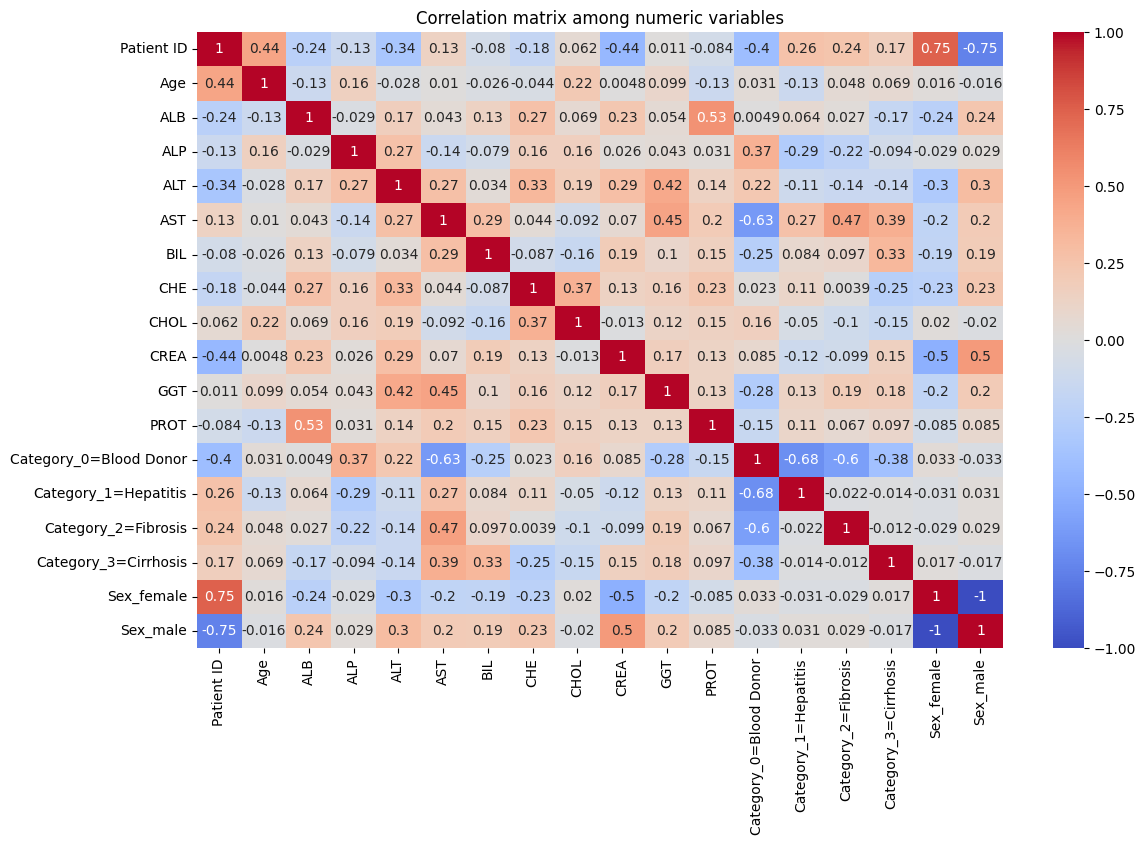

In [175]:
import seaborn as sns

plt.figure(figsize=(13,8))
corr = df_encoded.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation matrix among numeric variables')
plt.show()

In the heatmap is clear the high correlation between the columns sex_female and sex_male, creating redundancy. To not overcomplicate the model, the best option is to keep just one of the two sex columns. As
the drop_first=True option in get_dummies is difficult to implement in pipelines, LabelEncoder will be used instead to encode the sex column. For the category column, as there are more than two categories, the best option to use is One Hot Encoding with get_dummies


Additionally in the heatmap there is a strong correlation within the Patient ID and the sex columns. As Patient ID is not giving any relevant information, it is wise to get rid of this column too.

In [176]:
from sklearn.preprocessing import LabelEncoder
df_no_outliers = df_no_outliers.copy() #Creates a new dataset that can be modified without affect the original
le = LabelEncoder()
df_no_outliers['Sex'] = le.fit_transform(df_no_outliers['Sex'])

df_fully_encoded = pd.get_dummies(df_no_outliers, columns=['Category'], prefix='Category', dtype=int, drop_first=True)
print(df_fully_encoded.head())

df_fully_encoded = df_fully_encoded.drop(columns=['Patient ID'])
print(df_fully_encoded)

   Patient ID  Age  Sex       ALB       ALP       ALT       AST       BIL  \
0           1   32    1 -0.542701 -0.603230 -0.905494 -0.355457 -0.202289   
1           2   32    1 -0.542701  0.084054 -0.411380 -0.276283 -0.409283   
2           3   32    1  0.916417  0.253944  0.461714  0.573318 -0.282787   
3           4   32    1  0.273710 -0.622536  0.193070 -0.340231  0.453193   
4           5   32    1 -0.421108  0.230777  0.289014 -0.273238 -0.081542   

        CHE      CHOL      CREA       GGT      PROT  Category_1=Hepatitis  \
0 -0.581777 -1.916091  0.480336 -0.481022 -0.540788                     0   
1  1.354993 -0.524241 -0.151402 -0.416513  0.862566                     0   
2  0.290683 -0.169629  0.085500 -0.092127  1.386485                     0   
3 -0.399063 -0.577433 -0.032951 -0.081068  0.712875                     0   
4  0.432286 -0.949775 -0.111918 -0.152949 -0.596922                     0   

   Category_2=Fibrosis  Category_3=Cirrhosis  
0                    0     

A good option for future graphics is to recreate the original dataset without NAs, outliers and having the categorical columns with binary data

In [ ]:
#Recreate the original dataset but without outliers and binary categorical columns, so we can create graphics
df_original_filt = df_without_na[mask].copy()
df_raw = pd.get_dummies(df_original_filt, drop_first=True, dtype=int)
df_raw.drop(columns=['Patient ID'], inplace=True)
print(df_raw)

As some changes has been made in the dataset, it is wise to repeat the correlation matrix to have a better look to the relations among the different variables

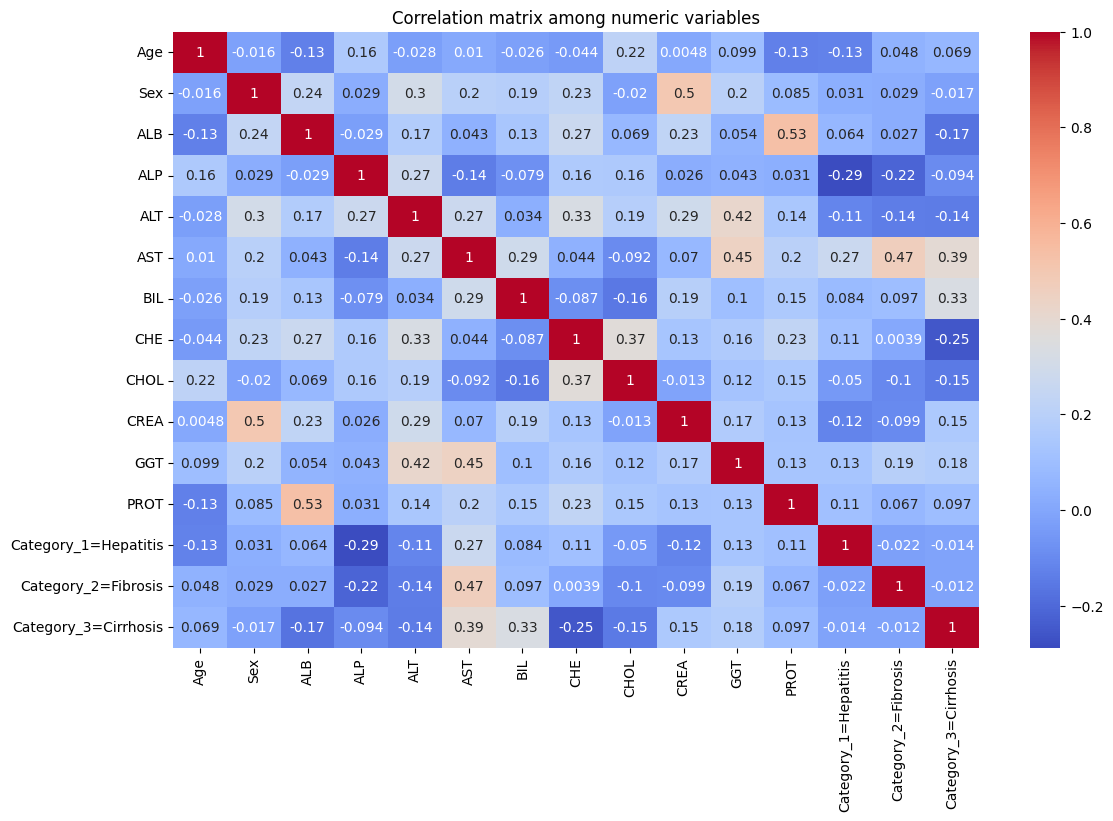

In [177]:
plt.figure(figsize=(13,8))
corr = df_fully_encoded.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation matrix among numeric variables')
plt.show()

As we can see, there aren't any strong correlation between variables but some weak to moderate correlation has been spotted:


*   Sex ~ CREA (+0.50)
*   ALB ~ PROT (+0.53)
*   ALP ~ Category_1=Hepatitis (-0.29)
*   ALT ~ Sex (+0.30)
*   ALT ~ CHE (+0.33)
*   ALT ~ GGT (+0.42)
*   AST ~ BIL (+0.29)
*   AST ~ GGT (+0.45)
*   AST ~ Category_2=Fibrosis (+0.47)
*   AST ~ Category_3=Cirrhosis (+0.39)
*   BIL ~ Category_3=Cirrhosis (+0.33)
*   CHE ~ CHOL (+0.37)
*   CREA ~ ALT (+0.29)

Aditionally, in the first heatmap there were some associations between category_0=Blood donor and other variables that we cannot see in the second heatmap because we remove this column to avoid multicolinearity with the rest of categories, but are worth to mention:

*  Category_0=Blood donor ~ GGT (-0.28)
*  Category_0=Blood donor ~ AST (-0.63)
*  Category_0=Blood donor ~ ALP (+0.37)

The threshold used to start considering some kind or correlation is 0.28 (either positilve or negative correlation)
As we can see, the correlation values are not very high, meaning the correlation are weak or weak to moderate. Maybe the combination of different variables with moderate correlation values in conjuction can predict value in a more accurate way. Additionally, maybe the polynomial regression is a better model for this dataset, so for this reason both types of regression will be tested.





















#Linear Regression

The first step is to define the features and the target of this regression model.
As ALT has a moderate positive correlation with GGT (+0.42), CHE (+0.33) and CREA (+0.29) and  it would be interesting to predict ALT values using GGT, CHE and CREA as features.


In [197]:
#Features (X) and target (y)

X = df_fully_encoded[['GGT', 'CHE', 'CREA']]
y = df_fully_encoded[['ALT']]

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Test size 0.2 means 20% od the dataset will be reserved for training the model and random state ensures the split is the same every time we run the code

In [199]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print(f"Model Intercept (theta_0): {model.intercept_}")
print(f"Model Coefficient (theta_1): {model.coef_}")

Model Intercept (theta_0): [0.0107203]
Model Coefficient (theta_1): [[0.46571752 0.18015523 0.34965057]]


In [200]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.41
R-squared: 0.23


As we can see, the r-squared is 0.23, which is a low value. This means that the features cannot predict ALT values with confidence.
As we used only the columns with the higherst correlation with the target, let's try using all numerical columns as features to see if que r-squared increases

In [204]:
#Features (X) and target (y)

X = df_fully_encoded[['ALB', 'ALP', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
y = df_fully_encoded[['ALT']]

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Test size 0.2 means 20% od the dataset will be reserved for training the model and random state ensures the split is the same every time we run the code

In [206]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print(f"Model Intercept (theta_0): {model.intercept_}")
print(f"Model Coefficient (theta_1): {model.coef_}")

Model Intercept (theta_0): [0.05262851]
Model Coefficient (theta_1): [[ 0.05123277  0.1797504   0.29886676 -0.08425896  0.12702103  0.05073964
   0.37444014  0.36517479 -0.03340371]]


In [207]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.36
R-squared: 0.33


The r-squared value is 0.33, which is better than the previous one but still not enough to predict ALT values with confidence.
Due to these results, it is wise to explore other options such as polynomical regression and different techniques to improve the model